In [7]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix
from sklearn.model_selection import train_test_split



(2000, 2)


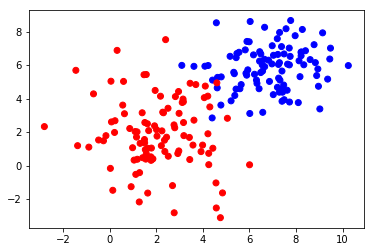

In [21]:
X1=2*np.random.randn(1000,2)+np.array([2,2])
X2=1.5*np.random.randn(1000,2)+np.array([7,6])
data=np.concatenate((X1,X2),axis=0).reshape((2000,2))
print(data.shape)
plt.show()
Y=np.concatenate((np.ones(1000),(-1*np.ones(1000)))).reshape((2000,1))
X_train, X_test, y_train, y_test = train_test_split( data, Y, test_size=0.9, random_state=42)
c=[]
for item in y_train:
    if item==1:
        c.append('red')
    else:
        c.append('blue')
plt.scatter(X_train.T[0,:],X_train.T[1,:],c=c)
plt.show()

In [26]:
X=X_train.T
Y=y_train
m,n= X.shape
C=1
A1=np.zeros((n,n))
for i in range(n):
    for j in range(n):
        A1[i,j]=np.matmul(X[:,i].T,X[:,j])
A1=A1+(1/C)*np.identity(n)
for i in range(n):
    for j in range(n):
        A1[i,j]=Y[i]*Y[j]*A1[i,j]
Aineq=matrix(-1*np.identity(n))
bineq=matrix(np.zeros((n,1)))


In [27]:
f=-1*np.ones((n,1))
Aeq=matrix(Y.T,tc='d')
beq=matrix(np.array([[0]]),tc="d")
beq


<1x1 matrix, tc='d'>

In [28]:
from cvxopt import solvers
sol = solvers.qp(matrix(A1,tc='d'),matrix(f,tc='d'),Aineq,bineq,Aeq,beq)




     pcost       dcost       gap    pres   dres
 0: -1.5625e+01 -3.8358e+01  4e+02  2e+01  2e+00
 1: -1.8203e+01 -2.4050e+01  6e+01  3e+00  2e-01
 2: -1.1203e+01 -9.9755e+00  7e+00  3e-01  3e-02
 3: -8.2558e+00 -7.9992e+00  7e-01  3e-02  2e-03
 4: -7.7405e+00 -7.7502e+00  3e-02  5e-04  4e-05
 5: -7.7392e+00 -7.7394e+00  5e-04  7e-06  5e-07
 6: -7.7393e+00 -7.7393e+00  5e-06  7e-08  6e-09
Optimal solution found.


In [29]:
alpha=np.array(sol['x'])
w=np.zeros((1,2))
for i in range(n):
    w=w+alpha[i]*Y[i]*X[:,i]

w=w.T

In [30]:

index_alpha=[]
for i in range(len(alpha)):
    if alpha[i][0]>.5 and C>alpha[i][0]:
        index_alpha.append(i)

sum_X=(X[:,index_alpha].sum(1)).reshape((2,1))
b=(-1/len(index_alpha))*np.matmul(w.T,sum_X)



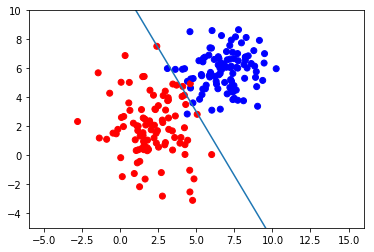

In [31]:
x1=np.linspace(-5,15,200)
x2=-(w[0]/w[1])*x1-b[0]/(w[1])
plt.scatter(X[0,:],X[1,:],c=c)
plt.plot(x1,x2,)
plt.ylim([-5, 10])
plt.show()